#Librerias

In [1]:
%matplotlib inline
import numpy as np    #Para el manejo de arreglos
import pandas as pd   #Para el manejo de conjuntos de datos, tratados como tablas
import seaborn as sns #Para la construcción y visualización de gráficos
import matplotlib.pyplot as plt #Para la construcción de gráficos
#Bibliotecas para decision tree
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier #  para entrenar  árboles de decisión
from sklearn import preprocessing #Para transformar los datos
from sklearn import metrics #Las métricas de rendimiento de un clasificador
from sklearn import model_selection #Para el particionamiento de los conjuntos de datos
#Bibliotecas para randome forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
#Biblioteca para SVM
from sklearn import preprocessing #Nos ayuda a convertir características categóricas a numéricas
from sklearn import svm  # SVM
#Biblioteca para kNN
from sklearn.neighbors import KNeighborsClassifier # Algoritmo kNN para clasificación
from sklearn.preprocessing import StandardScaler #Escalamiento de los datos con media cero y desviación 1

#Abrir el drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Llamar Data

In [3]:
variables = pd.read_csv("/content/drive/MyDrive/9. Noveno Semestre/Plataformas/Final/climate_change_impact_on_agriculture_2024.csv", sep=",")
variables.head(10)

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72
5,2019,USA,Midwest,Coffee,17.19,975.13,10.73,2.180,5,52.45,26.06,71.56,97.32,Water Management,353.16
6,1997,Argentina,Northeast,Fruits,23.46,1816.41,27.70,1.611,2,20.22,0.56,28.72,79.09,Organic Farming,480.61
7,2021,Australia,New South Wales,Rice,25.63,786.17,7.77,3.270,4,66.53,13.44,40.50,63.16,Drought-resistant Crops,1367.97
8,2012,India,Punjab,Wheat,32.08,1233.10,6.10,2.990,1,45.87,10.09,32.54,42.31,Water Management,761.89
9,2018,Nigeria,North West,Barley,21.23,475.32,25.74,0.765,1,25.74,44.38,72.92,84.21,No Adaptation,167.21


#Obtener shape de los datos (filas,columnas)

Observar cuantas filas y cuantas columnas tiene el dataset original

In [4]:
print("Número de filas:", variables.shape[0])
print("Número de columnas:", variables.shape[1])

Número de filas: 10000
Número de columnas: 15


#Lista de los nombres de los campos de una tabla

Observar que columnas tenemos

In [5]:
for col in variables.columns:
    print(col)

Year
Country
Region
Crop_Type
Average_Temperature_C
Total_Precipitation_mm
CO2_Emissions_MT
Crop_Yield_MT_per_HA
Extreme_Weather_Events
Irrigation_Access_%
Pesticide_Use_KG_per_HA
Fertilizer_Use_KG_per_HA
Soil_Health_Index
Adaptation_Strategies
Economic_Impact_Million_USD


#Descripción de la Información de la tabla y tipo de datos

In [6]:
# Resumen estadístico (solo numéricos)
print("Resumen estadístico:")
display(variables.describe())

# Información general de la tabla
print("\n Información general:")
variables.info()

# Tipos de datos de cada columna
print("\n Tipos de datos por columna:")
display(pd.DataFrame(variables.dtypes, columns=['Tipo de Dato']))

Resumen estadístico:


,Year,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2007.088700,15.241299,1611.663834,15.246608,2.240017,4.980900,55.248332,24.955735,49.973708,64.901278,674.269658
std,10.084245,11.466955,805.016815,8.589423,0.998342,3.165808,25.988305,14.490962,28.711027,20.195882,414.591431
min,1990.000000,-4.990000,200.150000,0.500000,0.450000,0.000000,10.010000,0.000000,0.010000,30.000000,47.840000
25%,1999.000000,5.430000,925.697500,7.760000,1.449000,2.000000,32.677500,12.527500,25.390000,47.235000,350.545000
50%,2007.000000,15.175000,1611.160000,15.200000,2.170000,5.000000,55.175000,24.930000,49.635000,64.650000,583.920000
75%,2016.000000,25.340000,2306.997500,22.820000,2.930000,8.000000,77.582500,37.470000,74.825000,82.472500,917.505000
max,2024.000000,35.000000,2999.670000,30.000000,5.000000,10.000000,99.990000,49.990000,99.990000,100.000000,2346.470000



 Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64

,Tipo de Dato
Year,int64
Country,object
Region,object
Crop_Type,object
Average_Temperature_C,float64
Total_Precipitation_mm,float64
CO2_Emissions_MT,float64
Crop_Yield_MT_per_HA,float64
Extreme_Weather_Events,int64
Irrigation_Access_%,float64


#Contar cantidad de valores nulos por campo(columna)

In [7]:
# Crear tabla con conteo de nulos
tabla_nulos = pd.DataFrame({
    "Columna": variables.columns,
    "Nulos": variables.isnull().sum().values
})

display(tabla_nulos)

,Columna,Nulos
0,Year,0
1,Country,0
2,Region,0
3,Crop_Type,0
4,Average_Temperature_C,0
5,Total_Precipitation_mm,0
6,CO2_Emissions_MT,0
7,Crop_Yield_MT_per_HA,0
8,Extreme_Weather_Events,0
9,Irrigation_Access_%,0


el dataset no tiene datos nulos

#Valores Únicos

In [8]:
display(pd.DataFrame({
    "Columna": variables.columns,
    "Valores Únicos": variables.nunique().values
}))

,Columna,Valores Únicos
0,Year,35
1,Country,10
2,Region,34
3,Crop_Type,10
4,Average_Temperature_C,3677
5,Total_Precipitation_mm,9784
6,CO2_Emissions_MT,2852
7,Crop_Yield_MT_per_HA,850
8,Extreme_Weather_Events,11
9,Irrigation_Access_%,6003


Las columnas Extreme_Weather_Events, Adaptation_Strategies, Year, Country y Region presentan muy pocos valores únicos, por lo que se eliminan. Estas variables no aportan información significativa para el proceso de predicción ni contribuyen a la variabilidad del modelo.

#Eliminar la columna con poca infromacion

Eliminar las columnas anterioirmente mencionadas

In [9]:
variables = variables.drop(["Extreme_Weather_Events","Adaptation_Strategies","Year","Country","Region"], axis=1)
display(variables)

,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
0,Corn,1.55,447.06,15.22,1.737,14.54,10.08,14.78,83.25,808.13
1,Corn,3.23,2913.57,29.82,1.737,11.05,33.06,23.25,54.02,616.22
2,Wheat,21.11,1301.74,25.75,1.719,84.42,27.41,65.53,67.78,796.96
3,Coffee,27.85,1154.36,13.91,3.890,94.06,14.38,87.58,91.39,790.32
4,Sugarcane,2.19,1627.48,11.81,1.080,95.75,44.35,88.08,49.61,401.72
...,...,...,...,...,...,...,...,...,...,...
9995,Cotton,30.48,685.93,17.64,3.033,27.56,41.96,10.95,43.41,1483.06
9996,Soybeans,9.53,2560.38,10.68,2.560,77.02,5.45,82.32,59.39,829.61
9997,Coffee,31.92,357.76,26.01,1.161,78.53,11.94,26.00,41.46,155.99
9998,Soybeans,13.95,1549.52,17.31,3.348,42.65,44.71,25.07,75.10,1613.90


Observamos la información de las variables que quedaron para ver la cantidad de datos y el tipo

In [10]:
print("\n Información general:")
variables.info()


 Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Crop_Type                    10000 non-null  object 
 1   Average_Temperature_C        10000 non-null  float64
 2   Total_Precipitation_mm       10000 non-null  float64
 3   CO2_Emissions_MT             10000 non-null  float64
 4   Crop_Yield_MT_per_HA         10000 non-null  float64
 5   Irrigation_Access_%          10000 non-null  float64
 6   Pesticide_Use_KG_per_HA      10000 non-null  float64
 7   Fertilizer_Use_KG_per_HA     10000 non-null  float64
 8   Soil_Health_Index            10000 non-null  float64
 9   Economic_Impact_Million_USD  10000 non-null  float64
dtypes: float64(9), object(1)
memory usage: 781.4+ KB


#Valores iguales a cero

Mirar si tenemos valores iguales a cero

In [11]:
# Check if any value in the DataFrame is equal to 0
has_zero_values = (variables == 0).any().any()

if has_zero_values:
    print("Se encontraron valores iguales a 0 en el DataFrame.")
else:
    print("No se encontraron valores iguales a 0 en el DataFrame.")

# Optionally, you can also see which columns have zero values
print("\nColumnas con valores iguales a 0:")
print((variables == 0).any())

Se encontraron valores iguales a 0 en el DataFrame.

Columnas con valores iguales a 0:
Crop_Type                      False
Average_Temperature_C          False
Total_Precipitation_mm         False
CO2_Emissions_MT               False
Crop_Yield_MT_per_HA           False
Irrigation_Access_%            False
Pesticide_Use_KG_per_HA         True
Fertilizer_Use_KG_per_HA       False
Soil_Health_Index              False
Economic_Impact_Million_USD    False
dtype: bool


Como observamos que tenemos valores iguales a cero, vamos a observar cuantos son para definir que vamos a hacer con ellos

In [12]:
print("\nConteo de valores iguales a 0 por columna:")
display((variables == 0).sum())


Conteo de valores iguales a 0 por columna:


,0
Crop_Type,0
Average_Temperature_C,0
Total_Precipitation_mm,0
CO2_Emissions_MT,0
Crop_Yield_MT_per_HA,0
Irrigation_Access_%,0
Pesticide_Use_KG_per_HA,2
Fertilizer_Use_KG_per_HA,0
Soil_Health_Index,0
Economic_Impact_Million_USD,0


Como se observa que son muy pocos (2), se decidio eliminar las filas donde Pesticide_Use_KG_per_HA es igual a cero para limpiar la base de datos

In [13]:
variables = variables[variables['Pesticide_Use_KG_per_HA'] != 0]
display(variables)

,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
0,Corn,1.55,447.06,15.22,1.737,14.54,10.08,14.78,83.25,808.13
1,Corn,3.23,2913.57,29.82,1.737,11.05,33.06,23.25,54.02,616.22
2,Wheat,21.11,1301.74,25.75,1.719,84.42,27.41,65.53,67.78,796.96
3,Coffee,27.85,1154.36,13.91,3.890,94.06,14.38,87.58,91.39,790.32
4,Sugarcane,2.19,1627.48,11.81,1.080,95.75,44.35,88.08,49.61,401.72
...,...,...,...,...,...,...,...,...,...,...
9995,Cotton,30.48,685.93,17.64,3.033,27.56,41.96,10.95,43.41,1483.06
9996,Soybeans,9.53,2560.38,10.68,2.560,77.02,5.45,82.32,59.39,829.61
9997,Coffee,31.92,357.76,26.01,1.161,78.53,11.94,26.00,41.46,155.99
9998,Soybeans,13.95,1549.52,17.31,3.348,42.65,44.71,25.07,75.10,1613.90


Verificar que no tenemos datos iguales a cero

In [14]:
print("\nConteo de valores iguales a 0 por columna:")
display((variables == 0).sum())


Conteo de valores iguales a 0 por columna:


,0
Crop_Type,0
Average_Temperature_C,0
Total_Precipitation_mm,0
CO2_Emissions_MT,0
Crop_Yield_MT_per_HA,0
Irrigation_Access_%,0
Pesticide_Use_KG_per_HA,0
Fertilizer_Use_KG_per_HA,0
Soil_Health_Index,0
Economic_Impact_Million_USD,0


Miramos el nuevo tamaño de nuestro dataset

In [15]:
print("Número de filas:", variables.shape[0])
print("Número de columnas:", variables.shape[1])

Número de filas: 9998
Número de columnas: 10


Mirar que cultivos tenemos

In [34]:
print("Valores únicos en la columna 'Crop_Type':")
display(variables['Crop_Type'].unique())
print("\nNúmero de valores únicos en la columna 'Crop_Type':")
print(variables['Crop_Type'].nunique())

Valores únicos en la columna 'Crop_Type':


array(['Corn', 'Wheat', 'Coffee', 'Sugarcane', 'Fruits', 'Rice', 'Barley',
       'Vegetables', 'Soybeans', 'Cotton'], dtype=object)


Número de valores únicos en la columna 'Crop_Type':
10


In [35]:
sugarcane_df = variables[variables['Crop_Type'] == 'Sugarcane']
print("Tamaño del nuevo dataset (filas, columnas):", sugarcane_df.shape)
display(sugarcane_df.head())

Tamaño del nuevo dataset (filas, columnas): (995, 10)


,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
4,Sugarcane,2.19,1627.48,11.81,1.080,95.75,44.35,88.08,49.61,401.72
10,Sugarcane,-3.57,1402.97,5.49,2.670,19.17,4.38,12.02,44.12,1100.44
36,Sugarcane,14.69,804.11,23.52,4.248,75.67,1.73,78.02,49.80,1581.37
40,Sugarcane,17.77,1743.11,13.69,1.690,23.95,39.15,67.61,42.34,440.49
50,Sugarcane,8.88,947.14,20.78,2.241,96.90,41.57,56.67,54.44,600.91


#SVM

Definir variables X (independientes) y y (dependiente)

In [36]:
# Variable dependiente
y = sugarcane_df['Crop_Yield_MT_per_HA']

# Variables independientes
X = sugarcane_df.drop(['Crop_Yield_MT_per_HA'], axis=1)

Escalamiento de las variables

In [38]:
# Remove the non-numerical 'Crop_Type' column before scaling
X = X.drop(['Crop_Type'], axis=1)

scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

Partición del conjunto de datos

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [40]:
# ===============================
# SVM con distintos kernels
# ===============================
svm_lineal = svm.SVR(kernel='linear', C=1.0)     # SVR = SVM para regresión
svm_rbf = svm.SVR(kernel='rbf', C=1.0, gamma='scale')
svm_poly = svm.SVR(kernel='poly', degree=3, C=1.0)

# Entrenar modelos
svm_lineal.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)

# ===============================
# Evaluación del modelo (Regresión)
# ===============================
modelos = {'Lineal': svm_lineal, 'RBF': svm_rbf, 'Polinómico': svm_poly}

resultados = []
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    r2 = metrics.r2_score(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    resultados.append({'Modelo': nombre, 'R²': r2, 'RMSE': rmse})
    print(f"Modelo {nombre} -> R²: {r2:.3f} | RMSE: {rmse:.3f}")

# Mostrar resultados en tabla
resultados_df = pd.DataFrame(resultados)
display(resultados_df)

Modelo Lineal -> R²: 0.562 | RMSE: 0.696
Modelo RBF -> R²: 0.531 | RMSE: 0.720
Modelo Polinómico -> R²: 0.398 | RMSE: 0.815


,Modelo,R²,RMSE
0,Lineal,0.561533,0.695663
1,RBF,0.530564,0.719812
2,Polinómico,0.398266,0.814954


Visualización de comparación

/tmp/ipython-input-1055185890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='R²', data=resultados_df, palette='viridis')


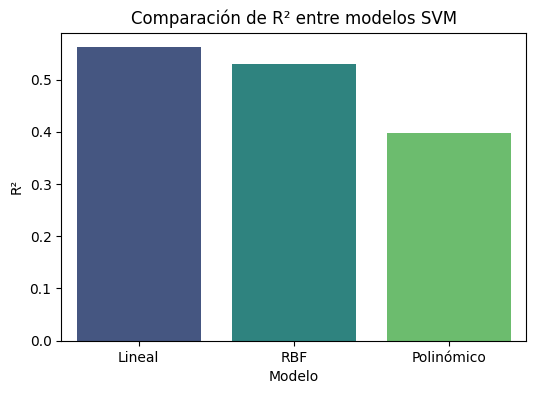

/tmp/ipython-input-1055185890.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='RMSE', data=resultados_df, palette='mako')


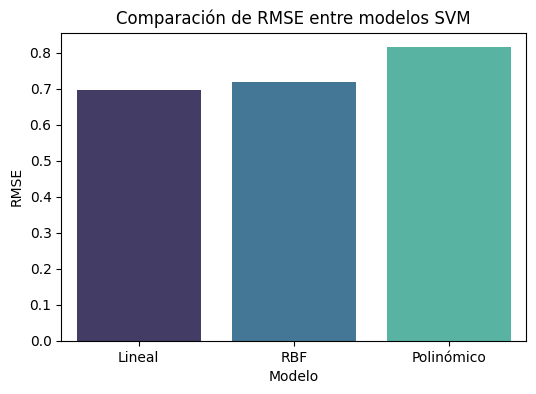

In [41]:
plt.figure(figsize=(6,4))
sns.barplot(x='Modelo', y='R²', data=resultados_df, palette='viridis')
plt.title('Comparación de R² entre modelos SVM')
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='Modelo', y='RMSE', data=resultados_df, palette='mako')
plt.title('Comparación de RMSE entre modelos SVM')
plt.show()

En la comparación de los tres kernels del modelo SVM (Lineal, RBF y Polinómico), se observa que los valores de R² se mantienen en un rango similar, cercanos a 0.5, lo que indica que los modelos logran explicar alrededor del 50 % de la variabilidad de los datos. El kernel Lineal presentó el valor más alto de R², reflejando una mejor capacidad de generalización al capturar relaciones no lineales.

En cuanto al RMSE, los tres modelos exhibieron errores promedio comparables, aunque el kernel Lineal obtuvo el valor más bajo, lo que evidencia un mejor ajuste global.

En conjunto, el kernel Lineal demostró ser el más adecuado para este conjunto de datos, proporcionando un equilibrio entre precisión y complejidad, mientras que el kernel Polinómico mostró una ligera pérdida de rendimiento, posiblemente por sobreajuste.

#Random Forest


Definir variables predictoras (X) y variable objetivo (y)

In [42]:
X = sugarcane_df.drop('Crop_Yield_MT_per_HA', axis=1)
y = sugarcane_df['Crop_Yield_MT_per_HA']

Escalamiento de los datos

In [51]:
# Remove the non-numerical 'Crop_Type' column before scaling
X = X.drop(['Crop_Type'], axis=1) # This line is no longer needed

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

División del dataset

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Crear y entrenar el modelo Random Forest

In [53]:
rf_model = RandomForestRegressor(
    n_estimators=100,      # Número de árboles
    random_state=42,
    max_depth=None,        # Profundidad libre (puede ajustarse)
    n_jobs=-1              # Usa todos los núcleos disponibles
)

rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [54]:
# ===============================
# Evaluar el modelo
# ===============================
y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² del modelo Random Forest: {r2:.3f}")
print(f"RMSE del modelo Random Forest: {rmse:.3f}")

# ===============================
# Importancia de las variables
# ===============================
importancias = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': rf_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("\nImportancia de las variables:")
display(importancias)

R² del modelo Random Forest: 0.663
RMSE del modelo Random Forest: 0.601

Importancia de las variables:


,Variable,Importancia
7,Economic_Impact_Million_USD,0.600839
0,Average_Temperature_C,0.129351
4,Pesticide_Use_KG_per_HA,0.050617
1,Total_Precipitation_mm,0.046487
2,CO2_Emissions_MT,0.046082
6,Soil_Health_Index,0.044272
5,Fertilizer_Use_KG_per_HA,0.041494
3,Irrigation_Access_%,0.040858


La estimación de importancia de variables obtenida a partir del modelo Random Forest evidencia que las variables económicas y climáticas son las que más influyen en la predicción del rendimiento agrícola.

En particular, la variable Economic_Impact_Million_USD presenta la mayor contribución (58.7 %), seguida por la temperatura promedio, las emisiones de CO₂ y la precipitación total.

Esto sugiere que los factores macroeconómicos y ambientales tienen un papel determinante sobre la productividad, mientras que las variables categóricas asociadas al tipo de cultivo presentan baja relevancia, posiblemente por su escasa variabilidad o redundancia en la muestra.

Visualización

/tmp/ipython-input-32969583.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=importancias, palette='viridis')


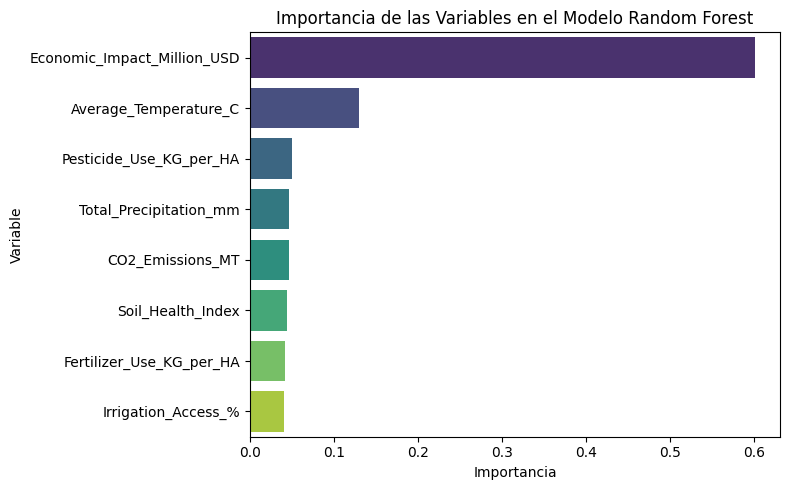

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(x='Importancia', y='Variable', data=importancias, palette='viridis')
plt.title('Importancia de las Variables en el Modelo Random Forest')
plt.tight_layout()
plt.show()

#kNN


Definir variables predictoras (X) y variable objetivo (y)

In [56]:
# Variable dependiente
y = sugarcane_df['Crop_Yield_MT_per_HA']

# Variables independientes
X = sugarcane_df.drop(['Crop_Yield_MT_per_HA'], axis=1)

División del dataset

In [57]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

Crear y entrenar el modelo KNN

In [58]:
# One-hot encode the 'Crop_Type' column
X_encoded = pd.get_dummies(X, columns=['Crop_Type'], drop_first=True)

# Split the data again with the encoded features
x_train, x_test, y_train, y_test = model_selection.train_test_split(X_encoded, y, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [59]:
from sklearn.neighbors import KNeighborsRegressor # Algoritmo kNN para regresión
classifier = KNeighborsRegressor(n_neighbors = 5, metric = 'euclidean')
classifier.fit(x_train, y_train)

KNeighborsRegressor(metric='euclidean')

In [60]:
#Clasificamos los datos de prueba
y_pred = classifier.predict(x_test)

Resultados

In [61]:
# Import metrics for regression
from sklearn.metrics import r2_score, mean_squared_error

# Evaluate the model using regression metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R²: {r2:.3f}')
print(f'RMSE: {rmse:.3f}')

R²: 0.466
RMSE: 0.705


Visualización de resultados

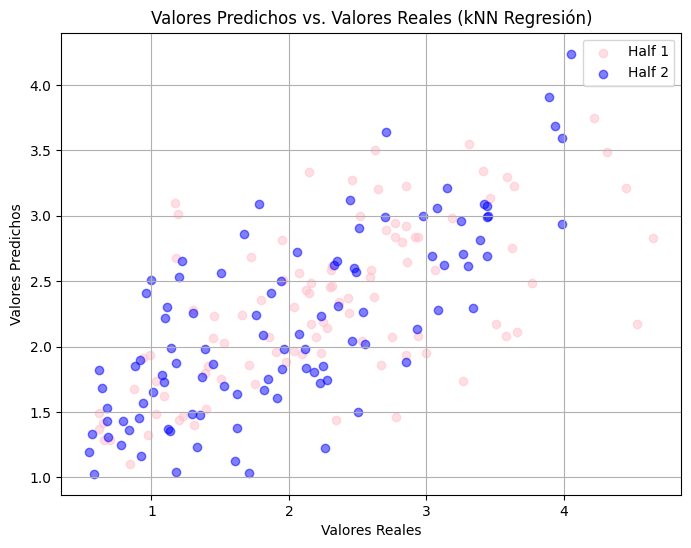

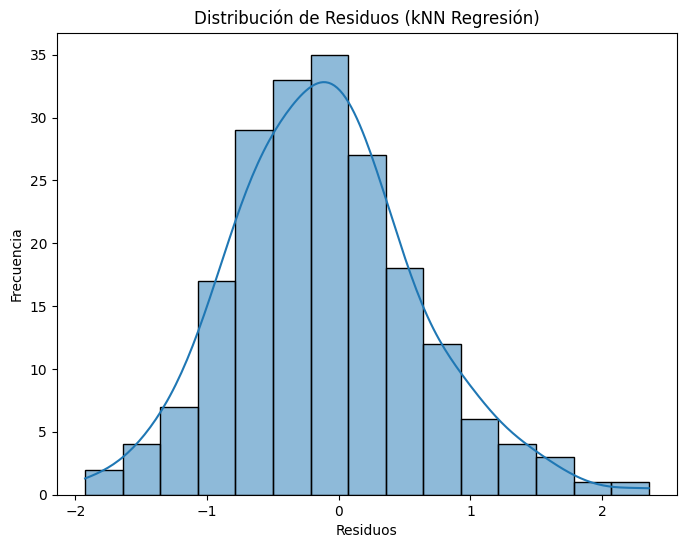

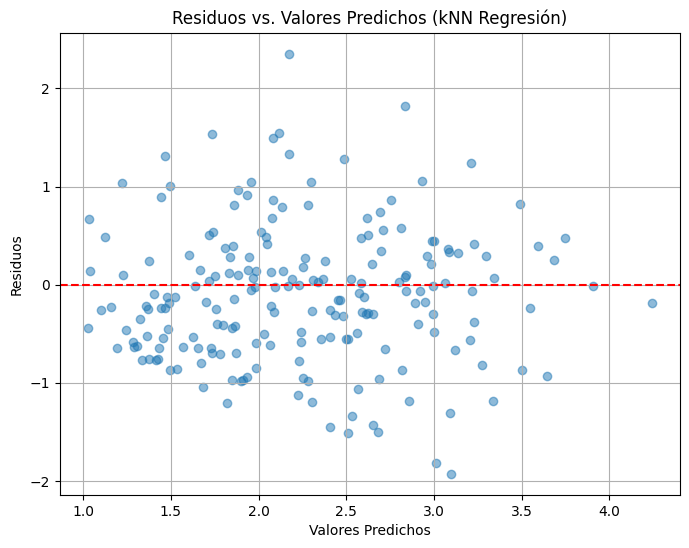

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plotting Predicted vs. Actual Values
plt.figure(figsize=(8, 6))
# Split the data into two halves for coloring
half_length = len(y_test) // 2
plt.scatter(y_test[:half_length], y_pred[:half_length], alpha=0.5, color='pink', label='Half 1')
plt.scatter(y_test[half_length:], y_pred[half_length:], alpha=0.5, color='blue', label='Half 2')
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Predichos vs. Valores Reales (kNN Regresión)")
plt.grid(True)
plt.legend() # Add a legend to distinguish the colors
plt.show()

# Plotting Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Distribución de Residuos (kNN Regresión)")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Residuos vs. Valores Predichos (kNN Regresión)")
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

Se observa una tendencia positiva, es decir, cuando los valores reales aumentan, los predichos también lo hacen. Sin embargo, los puntos no se alinean perfectamente sobre una línea diagonal (ideal), lo que indica que el modelo tiene cierta dispersión y no predice con exactitud todos los casos.

En la ultima los puntos están distribuidos de manera aleatoria alrededor de la línea roja (cero), lo cual indica que el modelo no presenta un patrón de error sistemático. La dispersión es moderada, pero se observa una ligera acumulación de puntos alrededor de valores predichos entre 1.5 y 3, lo que sugiere que el modelo se desempeña mejor en ese rango.
